# Adaptive Boosting (AdaBoost)

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases. AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers.

The AdaBoost algorithm is best illustrated with using the following diagram:

<img src="extras/07_09.png" width="500" height="500" />

We start with subfigure 1, which represents a training set for binary classification where all training samples are assigned equal weights. Based on this training set, we train a decision stump (shown as a dashed line) that tries to classify the samples of the two classes (triangles and circles) as well as possible by minimizing the cost function (or the impurity score in the special case of decision tree ensembles). For the next round (subfigure 2), we assign a larger weight to the two previously misclassified samples (circles). Furthermore, we lower the weight of the correctly classified samples. The next decision stump will now be more focused on the training samples that have the largest weights, that is, the training samples that are supposedly hard to classify. The weak learner shown in subfigure 2 misclassifies three different samples from the circle-class, which are then assigned a larger weight as shown in subfigure 3. Assuming that our AdaBoost ensemble only consists of three rounds of boosting, we would then combine the three weak learners trained on different reweighted training subsets by a weighted majority vote, as shown in subfigure 4.

For clarity, we will denote element-wise multiplication by the cross symbol (×) and the dot product between two vectors by a dot symbol (.), respectively. The steps are as follows:

![](extras/adaboost.png)

## Coding Example

In our coding example, we will compare decision tree classifier to an AdaBoost model using the Titanic dataset.

In [22]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import sys
import seaborn as sns
%matplotlib inline

In [23]:
data = pd.read_csv('Data/titanic_train.csv')

X = pd.concat([pd.get_dummies(data['Sex'], drop_first=True),data['Fare']], axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1,
                              random_state=0)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=900, 
                         learning_rate=.5,
                         random_state=0)

In [71]:
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))

Decision tree train/test accuracies 0.801/0.754
AdaBoost train/test accuracies 0.827/0.735


We note that the AdaBoost model seems to overift, and that the decision tree classifier performs better than the AdaBoost model on the test set. Looking at our diagram below, we see that the decision tree classifier simply split on gender. 

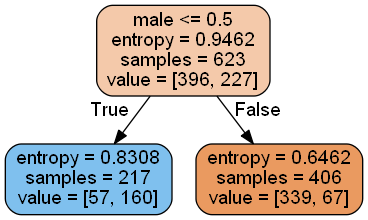

In [26]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = X_train.columns

dot_data = StringIO()  
export_graphviz(tree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## References

- Raschka, Sebastian. Python Machine Learning. Packt Publishing, 2015, Birmingham, UK.
- https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/
- https://www.analyticsvidhya.com/blog/2015/05/boosting-algorithms-simplified/
- http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
- https://jeremykun.com/2015/05/18/boosting-census/
- https://en.wikipedia.org/wiki/AdaBoost